# MSPR Big Data 

# Initialisation

## Pre-requis

## Chargement Libraries 

In [1]:

# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
#import plotly.express as px
import numpy as np
import warnings
from datetime import date 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#import scipy 
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import pearsonr
from scipy.stats import shapiro

warnings.filterwarnings('ignore')

# Traitement des données : General Results

## Chargement des données 

In [2]:
df_general_results = pd.read_csv("Data/general_results.csv", delimiter=";")
df_general_results

,id_election,id_brut_miom,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,Code de la circonscription,Libellé de la circonscription,Code du canton,Libellé du canton
0,2019_euro_t1,01001_0001,01,Ain,1,L'Abergement-Clémenciat,0001,601,268,44.59,...,18,3.00,5.41,314,52.25,94.29,NaN,NaN,NaN,NaN
1,2019_euro_t1,01002_0001,01,Ain,2,L'Abergement-de-Varey,0001,210,69,32.86,...,2,0.95,1.42,135,64.29,95.74,NaN,NaN,NaN,NaN
2,2019_euro_t1,01004_0001,01,Ain,4,Ambérieu-en-Bugey,0001,1050,548,52.19,...,13,1.24,2.59,474,45.14,94.42,NaN,NaN,NaN,NaN
3,2019_euro_t1,01004_0002,01,Ain,4,Ambérieu-en-Bugey,0002,1106,527,47.65,...,24,2.17,4.15,540,48.82,93.26,NaN,NaN,NaN,NaN
4,2019_euro_t1,01004_0003,01,Ain,4,Ambérieu-en-Bugey,0003,1058,485,45.84,...,8,0.76,1.40,551,52.08,96.16,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843563,2014_muni_t2,ZP057_0002,ZP,NaN,57,Ua-Pou,0002,157,15,9.55,...,1,0.64,0.70,141,89.81,99.30,NaN,NaN,NaN,NaN
2843564,2014_muni_t2,ZP057_0006,ZP,NaN,57,Ua-Pou,0006,70,7,10.00,...,0,0.00,0.00,63,90.00,100.00,NaN,NaN,NaN,NaN
2843565,2014_muni_t2,ZP058_0001,ZP,NaN,58,Uturoa,0001,1179,350,29.69,...,10,0.85,1.21,819,69.47,98.79,NaN,NaN,NaN,NaN
2843566,2014_muni_t2,ZP058_0002,ZP,NaN,58,Uturoa,0002,1029,225,21.87,...,8,0.78,1.00,796,77.36,99.00,NaN,NaN,NaN,NaN


In [3]:
df_candidats_results = pd.read_csv("Data\candidats_results.csv", delimiter = ";")
df_candidats_results 

,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
0,2019_euro_t1,01001_0001,01,1,0001,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,13.0,2.16,4.14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019_euro_t1,01002_0001,01,2,0001,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,6.0,2.86,4.44,NaN,NaN,NaN,NaN,NaN,NaN
2,2019_euro_t1,01004_0001,01,4,0001,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,39.0,3.71,8.23,NaN,NaN,NaN,NaN,NaN,NaN
3,2019_euro_t1,01004_0002,01,4,0002,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,42.0,3.80,7.78,NaN,NaN,NaN,NaN,NaN,NaN
4,2019_euro_t1,01004_0003,01,4,0003,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,31.0,2.93,5.63,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591930,2002_pres_t1,55026_0002,55,26,2,12.0,NaN,NaN,NaN,6.0,10.34,NaN,NaN,HUE,ROBERT,HUE,NaN,NaN
20591931,2002_pres_t1,55026_0002,55,26,2,13.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,CHEVENEMENT,JEAN-PIERRE,CHEV,NaN,NaN
20591932,2002_pres_t1,55026_0002,55,26,2,14.0,NaN,NaN,NaN,5.0,8.62,NaN,NaN,MADELIN,ALAIN,MADE,NaN,NaN
20591933,2002_pres_t1,55026_0002,55,26,2,15.0,NaN,NaN,NaN,5.0,8.62,NaN,NaN,LAGUILLER,ARLETTE,LAGU,NaN,NaN


## Optimisation des données 

### Restructuration des tables 

##### Introduction

On va rechercher à structurer les données afin de pouvoir obtenir un modèle de données utilisable avec une quantité de RAM tolérable.

on va découper les DataSets en plus petit paquets, et les relier entre eux avec des clés. 
On en profitera dans ce processus pour traiter les données :

- Isolation de 1 information par colonne. 
- Séparation des colonnes dans différentes Tables selon quantité d'information
- Liaison des différentes Tables 

In [4]:
df_general_results.describe(include = "all")

,id_election,id_brut_miom,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,Code de la circonscription,Libellé de la circonscription,Code du canton,Libellé du canton
count,2843568,2843568,2843568,1048131,2843568.0,2843568,2843568,2.843568e+06,2.843568e+06,2.843565e+06,...,2.843568e+06,2.843565e+06,2.843450e+06,2.843568e+06,2.843565e+06,2.843450e+06,821323.000000,554894,521264.000000,254835
unique,49,82401,195,107,36965.0,76311,3634,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,2143
top,2024_euro_t1,38169_0007,13,Nord,56.0,Paris,0001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2ème circonscription,NaN,Bagnères-de-Luchon
freq,70104,47,57086,30546,40224.0,30867,1413386,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107346,NaN,568
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.713680e+02,2.916609e+02,4.063266e+01,...,1.241485e+01,2.088309e+00,3.515983e+00,3.626764e+02,5.651993e+01,9.511109e+01,4.168365,NaN,17.752446,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.212469e+03,1.057580e+03,1.711362e+01,...,1.529451e+01,2.185152e+00,3.456750e+00,3.122537e+02,1.662489e+01,4.201456e+00,3.283668,NaN,13.245502,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,-6.000000e-02,-1.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.680000e+02,8.700000e+01,2.682000e+01,...,3.000000e+00,7.100000e-01,1.330000e+00,1.500000e+02,4.434000e+01,9.367000e+01,2.000000,NaN,8.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.280000e+02,2.440000e+02,4.159000e+01,...,8.000000e+00,1.550000e+00,2.770000e+00,3.340000e+02,5.579000e+01,9.615000e+01,3.000000,NaN,15.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.660000e+02,4.460000e+02,5.306000e+01,...,1.700000e+01,2.830000e+00,4.760000e+00,5.190000e+02,6.930000e+01,9.777000e+01,5.000000,NaN,25.000000,NaN


#### Traitement : Liste Election

On va ici commencer par réduire la taille de la table principale en isolant les données des id_election.
Elle seront associés à un index unique et auto-incrémenté et remplacer par une référence avec un simple id 

In [5]:


# Liste des éléctions 
df_id_election = pd.DataFrame(df_general_results["id_election"].unique(), columns=["id_election"])

# On va séparer les colonnes de l'éléction en 3 colonnes distinctes
df_id_election[['Year', 'Type', 'Number']] = df_id_election['id_election'].str.split('_', expand=True)
df_id_election.head()

,id_election,Year,Type,Number
0,2019_euro_t1,2019,euro,t1
1,2017_legi_t1,2017,legi,t1
2,2022_legi_t1,2022,legi,t1
3,2021_dpmt_t2,2021,dpmt,t2
4,2022_pres_t2,2022,pres,t2


On va remplacer les valeurs par les id correspondants dans la table principale

In [6]:
df_general_results.head()

,id_election,id_brut_miom,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,Code de la circonscription,Libellé de la circonscription,Code du canton,Libellé du canton
0,2019_euro_t1,01001_0001,01,Ain,1,L'Abergement-Clémenciat,0001,601,268,44.59,...,18,3.00,5.41,314,52.25,94.29,NaN,NaN,NaN,NaN
1,2019_euro_t1,01002_0001,01,Ain,2,L'Abergement-de-Varey,0001,210,69,32.86,...,2,0.95,1.42,135,64.29,95.74,NaN,NaN,NaN,NaN
2,2019_euro_t1,01004_0001,01,Ain,4,Ambérieu-en-Bugey,0001,1050,548,52.19,...,13,1.24,2.59,474,45.14,94.42,NaN,NaN,NaN,NaN
3,2019_euro_t1,01004_0002,01,Ain,4,Ambérieu-en-Bugey,0002,1106,527,47.65,...,24,2.17,4.15,540,48.82,93.26,NaN,NaN,NaN,NaN
4,2019_euro_t1,01004_0003,01,Ain,4,Ambérieu-en-Bugey,0003,1058,485,45.84,...,8,0.76,1.40,551,52.08,96.16,NaN,NaN,NaN,NaN


In [7]:
df_general_results = df_general_results.merge(df_id_election, on="id_election")
df_general_results.head()

,id_election,id_brut_miom,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Exprimés,% Exp/Ins,% Exp/Vot,Code de la circonscription,Libellé de la circonscription,Code du canton,Libellé du canton,Year,Type,Number
0,2019_euro_t1,01001_0001,01,Ain,1,L'Abergement-Clémenciat,0001,601,268,44.59,...,314,52.25,94.29,NaN,NaN,NaN,NaN,2019,euro,t1
1,2019_euro_t1,01002_0001,01,Ain,2,L'Abergement-de-Varey,0001,210,69,32.86,...,135,64.29,95.74,NaN,NaN,NaN,NaN,2019,euro,t1
2,2019_euro_t1,01004_0001,01,Ain,4,Ambérieu-en-Bugey,0001,1050,548,52.19,...,474,45.14,94.42,NaN,NaN,NaN,NaN,2019,euro,t1
3,2019_euro_t1,01004_0002,01,Ain,4,Ambérieu-en-Bugey,0002,1106,527,47.65,...,540,48.82,93.26,NaN,NaN,NaN,NaN,2019,euro,t1
4,2019_euro_t1,01004_0003,01,Ain,4,Ambérieu-en-Bugey,0003,1058,485,45.84,...,551,52.08,96.16,NaN,NaN,NaN,NaN,2019,euro,t1


#### Creation Table Localite

In [8]:
df_departement = df_general_results[[ "Code du département","Libellé du département"]]
df_departement=df_departement.drop_duplicates()
df_departement.describe()

,Code du département,Libellé du département
count,377,182
unique,195,107
top,01,Gironde
freq,2,2


In [9]:
df_commune = df_general_results[[ "Code de la commune","Libellé de la commune"]].drop_duplicates()
df_commune.describe()

,Code de la commune,Libellé de la commune
count,122234,122234
unique,36965,76311
top,58,Sainte-Colombe
freq,212,27


# Traitement des données : delinquance

## Chargement des données 

In [10]:
df_delinquance = pd.read_csv("Data/serieschrono-datagouv2.csv" , delimiter = ";")
df_delinquance

,Valeurs,Unite_temps,Titre,Ordonnees,Indicateur,SourceGraphique,Sous_indicateur,Nomenclature,Declinaison,Statistique,Zone_geographique,Champ,Periodicite,Unite_de_compte
0,26231,2016M01,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
1,26890,2016M02,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
2,26587,2016M03,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
3,27103,2016M04,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
4,26857,2016M05,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29355,1350,2019,Infractions numériques enregistrées par la pol...,Nombre d'infractions,Infractions liées au numérique,"SSMSI, bases statistiques des infractions enre...",Atteintes législations spécifiques au numérique,Non Renseigné,Non Renseigné,Nombre,France,France,Annuelle,Infraction
29356,1240,2020,Infractions numériques enregistrées par la pol...,Nombre d'infractions,Infractions liées au numérique,"SSMSI, bases statistiques des infractions enre...",Atteintes législations spécifiques au numérique,Non Renseigné,Non Renseigné,Nombre,France,France,Annuelle,Infraction
29357,1540,2021,Infractions numériques enregistrées par la pol...,Nombre d'infractions,Infractions liées au numérique,"SSMSI, bases statistiques des infractions enre...",Atteintes législations spécifiques au numérique,Non Renseigné,Non Renseigné,Nombre,France,France,Annuelle,Infraction
29358,1420,2022,Infractions numériques enregistrées par la pol...,Nombre d'infractions,Infractions liées au numérique,"SSMSI, bases statistiques des infractions enre...",Atteintes législations spécifiques au numérique,Non Renseigné,Non Renseigné,Nombre,France,France,Annuelle,Infraction


In [11]:
df_delinquance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29360 entries, 0 to 29359
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Valeurs            29316 non-null  object
 1   Unite_temps        29360 non-null  object
 2   Titre              29360 non-null  object
 3   Ordonnees          29360 non-null  object
 4   Indicateur         29360 non-null  object
 5   SourceGraphique    29360 non-null  object
 6   Sous_indicateur    29360 non-null  object
 7   Nomenclature       29360 non-null  object
 8   Declinaison        29360 non-null  object
 9   Statistique        29360 non-null  object
 10  Zone_geographique  29360 non-null  object
 11  Champ              29360 non-null  object
 12  Periodicite        29360 non-null  object
 13  Unite_de_compte    29360 non-null  object
dtypes: object(14)
memory usage: 3.1+ MB


In [12]:
for column in df_delinquance.columns:
    unique_count = df_delinquance[column].nunique()
    print(f"valeur uniques de {column}  : {unique_count}")


valeur uniques de Valeurs  : 19798
valeur uniques de Unite_temps  : 151
valeur uniques de Titre  : 165
valeur uniques de Ordonnees  : 13
valeur uniques de Indicateur  : 27
valeur uniques de SourceGraphique  : 9
valeur uniques de Sous_indicateur  : 77
valeur uniques de Nomenclature  : 3
valeur uniques de Declinaison  : 8
valeur uniques de Statistique  : 3
valeur uniques de Zone_geographique  : 105
valeur uniques de Champ  : 105
valeur uniques de Periodicite  : 3
valeur uniques de Unite_de_compte  : 10


In [13]:
df_delinquance["Unite_de_compte"].unique()

array(['Victimes', 'Infractions', 'Véhicules', 'Mis en cause',
       'Atteintes', 'Ménages victimes', 'Personnes de 14 ans ou plus',
       'Victime', 'Ménage victime', 'Infraction'], dtype=object)

In [14]:
df_delinquance["Ordonnees"].unique()

array(['Nombre de victimes', "Nombre d'infractions",
       'Nombre de véhicules', 'Nombre de mis en cause',
       "Nombre d'atteintes", 'Nombre de ménages victimes',
       'Nombre de personnes de 14 ans ou plus', '(en %)',
       'Nombre de victimes pour 1000 habitants',
       "Nombre d'infractions pour 1000 habitants",
       "Nombre d'infractions pour 1000 logements",
       'Nombre de véhicules pour 1000 habitants',
       'Nombre de mis en cause pour 1000 habitants'], dtype=object)

In [15]:
df_delinquance["Sous_indicateur"].unique()

array(['Non Renseigné', 'Ensemble', 'Vols avec armes',
       'Vols dans les véhicules', "Vols d'accessoires sur véhicules",
       'Vols de véhicules', 'Vols violents sans arme',
       'Trafic de stupéfiants', 'Usage de stupéfiants',
       'Logements (résidences principales et secondaires)', 'Abandon',
       'Sévices graves', 'Autres', 'Involontaire', 'Mauvais traitements',
       'Contre la voiture', "Infractions d'exploitation de la mendicité",
       "Infractions d'exploitation par le travail",
       'Autres atteintes à la probité', 'Favoritisme',
       "Prise illégale d'intérêts", 'Détournements de fonds publics',
       'Corruption', 'Hors ménage',
       'Violences physiques et/ou sexuelles au sein du ménage',
       'Vols dans ou sur des véhicules',
       "Vols et tentatives de vol d'objets dans ou sur la voiture",
       'Vols et tentatives de vols de deux-roues motorisés',
       'Vols et tentatives de vols de vélos', 'Vols de vélos',
       'Vols et tentatives de vols 

# Analyse Données 

## Préparation Données 

In [16]:
# Remplacer les virgules par des points dans la colonne "Valeurs"
df_delinquance["Valeurs"] = df_delinquance["Valeurs"].str.replace(',', '.')
df_delinquance

,Valeurs,Unite_temps,Titre,Ordonnees,Indicateur,SourceGraphique,Sous_indicateur,Nomenclature,Declinaison,Statistique,Zone_geographique,Champ,Periodicite,Unite_de_compte
0,26231,2016M01,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
1,26890,2016M02,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
2,26587,2016M03,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
3,27103,2016M04,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
4,26857,2016M05,Escroqueries et les fraudes aux moyens de paie...,Nombre de victimes,Escroqueries et les fraudes aux moyens de paie...,"SSMSI, base statistique des victimes enregistr...",Non Renseigné,Non Renseigné,Non Renseigné,Nombre,France,France,Mensuelle,Victimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29355,1350,2019,Infractions numériques enregistrées par la pol...,Nombre d'infractions,Infractions liées au numérique,"SSMSI, bases statistiques des infractions enre...",Atteintes législations spécifiques au numérique,Non Renseigné,Non Renseigné,Nombre,France,France,Annuelle,Infraction
29356,1240,2020,Infractions numériques enregistrées par la pol...,Nombre d'infractions,Infractions liées au numérique,"SSMSI, bases statistiques des infractions enre...",Atteintes législations spécifiques au numérique,Non Renseigné,Non Renseigné,Nombre,France,France,Annuelle,Infraction
29357,1540,2021,Infractions numériques enregistrées par la pol...,Nombre d'infractions,Infractions liées au numérique,"SSMSI, bases statistiques des infractions enre...",Atteintes législations spécifiques au numérique,Non Renseigné,Non Renseigné,Nombre,France,France,Annuelle,Infraction
29358,1420,2022,Infractions numériques enregistrées par la pol...,Nombre d'infractions,Infractions liées au numérique,"SSMSI, bases statistiques des infractions enre...",Atteintes législations spécifiques au numérique,Non Renseigné,Non Renseigné,Nombre,France,France,Annuelle,Infraction


In [17]:
# Remplacer les virgules par des points dans la colonne "Valeurs"
df_delinquance["Valeurs"] = df_delinquance["Valeurs"].str.replace(',', '.')

# Convertir la colonne "Valeurs" en float, remplacer les erreurs par NaN
df_Input = pd.to_numeric(df_delinquance["Valeurs"], errors='coerce')



# Supprimer les lignes contenant des NaN
df_Input = df_Input.dropna()

df_Input

0        26231.0
1        26890.0
2        26587.0
3        27103.0
4        26857.0
          ...   
29355     1350.0
29356     1240.0
29357     1540.0
29358     1420.0
29359     1270.0
Name: Valeurs, Length: 29316, dtype: float64

## Scaling Data

In [18]:
#on va d'utiliser la fonction robust scaler pour normaliser les données vu qui en theorie gere mieux les outliers 
# Normaliser les données avec RobustScaler
X = df_Input.values.reshape(-1, 1)  # Reshape nécessaire pour RobustScaler
transformer = RobustScaler().fit(X)
X_scaled = transformer.transform(X)

# Afficher les données normalisées
print(X_scaled)

[[18.136794  ]
 [18.59350578]
 [18.38351539]
 ...
 [ 1.02500261]
 [ 0.9418381 ]
 [ 0.83788246]]


## Correlation

In [19]:
# fonctions pour l'ACP
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)



def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels : 
        
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') 

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [20]:
# Appliquer l'ACP

n_components = 1
#on instancie le pca
pca = PCA(n_components=n_components)

#on applique le pca sur nos données 
pca.fit(X_scaled)

PCA(n_components=1)

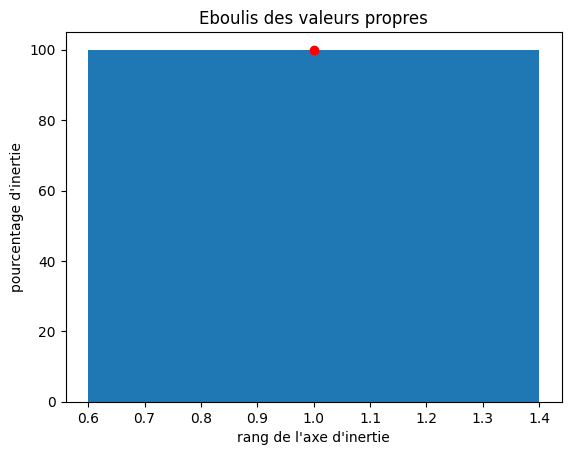

In [21]:
# Eboulis des valeurs propres
display_scree_plot(pca)

plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

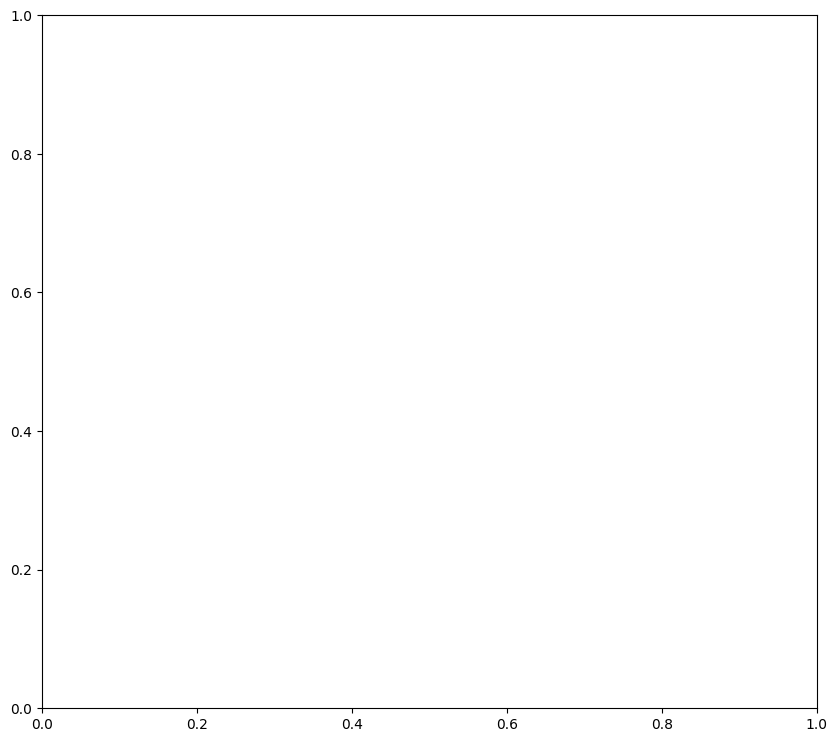

In [22]:
x_y=[0,1]
features=pd.DataFrame(df_Input).columns
correlation_graph(pca, x_y,features)

In [ ]:
x_y = [0,1]
X_proj = pca.transform(X_scaled)
X_proj = X_proj[:,:2]
display_factorial_planes(X_proj, x_y)

## Clustering

In [ ]:
# Utiliser la méthode du coude pour determiner le nombre des clusters
intertia = []
k_list = range(1, 10)
list(k_list)
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_proj) 
  intertia.append(kmeans.inertia_)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

In [ ]:
# D'apres la courbe, on peut avoir 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_proj)

In [ ]:
kmeans.labels_

In [ ]:
df_Input['Cluster']=kmeans.labels_
df_Input

In [ ]:

df_Input[df_Input['Cluster']==0]

In [ ]:
display_factorial_planes(X_proj, x_y,clusters = kmeans.labels_ )

In [ ]:
# Affichage des positions des centres de classes
plt.figure()
centroids = kmeans.cluster_centers_
centroids_projected = kmeans.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

In [ ]:
# Determiner le nombre de localité par cluster
clusters = kmeans.labels_
crosstab = pd.crosstab('Zone', clusters , dropna=False)
crosstab.rename_axis(columns="cluster", index="Zone", inplace=True)
crosstab

In [ ]:
#Première comparaison des moyennes afin d'identifier le groupe de localités qui peut nous interesser à ce niveau de l'analyse
df_groupes_km=df_Input
df_groupes_km['cluster']=kmeans.labels_
df_groupes_km.groupby('cluster').mean()

# Prediction des données 

## Initialisation

In [ ]:
import numpy as np
import pandas as pd
import graphviz

import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor

## Séparation des données 

In [ ]:
# Extraction du jeu de données train et test
here = None
X_train, X_test, y_train, y_test = train_test_split( here.data, here.target, test_size=0.33, random_state=None)

## Decision Tree

### Choix Métrique Evaluation

In [ ]:
#Choix de la métrique
regressor = DecisionTreeRegressor(random_state = None,max_depth=4)

regressor.fit(X_train,y_train)
print(regressor)
print("score train =",regressor.score(X_train,y_train)*100)
print("Score test =",regressor.score(X_test,y_test)*100)
print("Différence =",(regressor.score(X_train,y_train)-regressor.score(X_test,y_test))*100)
print("Depth =",regressor.get_depth())

### Entrainement du model

In [ ]:
regressor.fit(X_train,y_train)
print(regressor)
print("score train =",regressor.score(X_train,y_train)*100)
print("Score test =",regressor.score(X_test,y_test)*100)
print("Différence =",(regressor.score(X_train,y_train)-regressor.score(X_test,y_test))*100)
print("Depth =",regressor.get_depth())

### Prédictions

In [ ]:
# Prédictions sur le jeu de train
regressor.predict(X_train)

In [ ]:
# Prédictions sur le jeu de test
regressor.predict(X_test)

### Arbre de décision

In [ ]:
tree.plot_tree(regressor)

## Random Forest

### Choix Métrique

In [ ]:
#todo random forest 
regr = RandomForestRegressor(max_depth=7, random_state=0)


### Entrainement du Model

In [ ]:
regr.fit(X_train, y_train)

In [ ]:
regr.score(X_train,y_train)

In [ ]:
regr.score(X_test,y_test)

## Random Forest par Cross_Validation

### Définition Paramètres

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 40, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



### Entrainement du model

In [ ]:
# search across 100 different combinations, and use all available cores
rdt_random = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid,
                              n_iter = 50, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rdt_random.fit(X_train, y_train)

In [ ]:
rdt_random.best_params_

In [ ]:
#Afficher les resultats des modeles et les trier
pd.DataFrame(rdt_random.cv_results_).sort_values("rank_test_score")

In [ ]:
rf_random.best_estimator_.predict(X_test)

## Autres Models

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)